In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('tsa\shampoo.csv', header=0, parse_dates=[0], index_col=[0], date_parser=parser,                                   squeeze=True)
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [85]:
df = pd.DataFrame({'date':series.index, 'sales':series.values})
df = df.set_index(df.date)
df.drop(['date'], axis=1, inplace=True)
df.head()

,sales
date,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


<AxesSubplot:xlabel='Month'>

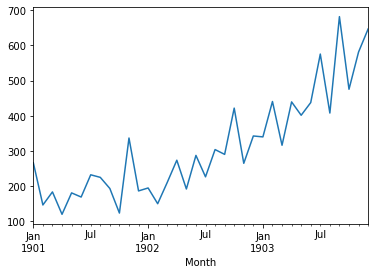

In [11]:
series.plot()

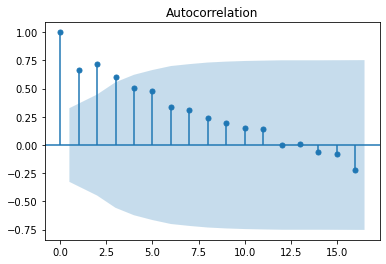

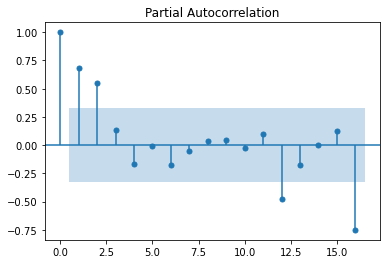

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series)
plot_pacf(series)
plt.show()


In [29]:
# fit model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series, order=(2, 1, 0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -200.188
Date:                Sun, 03 Jan 2021   AIC                            406.376
Time:                        10:46:00   BIC                            411.042
Sample:                    01-01-1901   HQIC                           407.987
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9139      0.225     -4.067      0.000      -1.354      -0.473
ar.L2         -0.2630      0.189     -1.392      0.164      -0.633       0.107
sigma2      5311.7175   1383.504      3.839      0.0

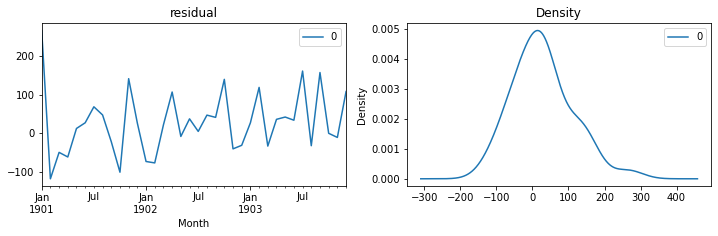

In [37]:
# plot residual error 

residuals = pd.DataFrame(model_fit.resid)
fig, axes = plt.subplots(1,2, figsize=(12, 3))
residuals.plot(title='residual', ax=axes[0])
residuals.plot(kind='kde', title='Density', ax=axes[1])
plt.show()

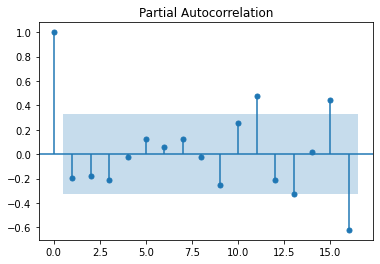

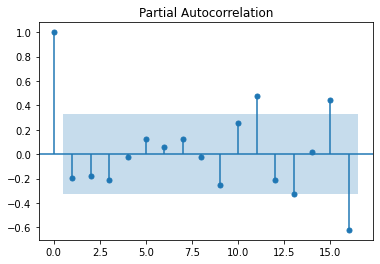

In [78]:
plot_pacf(residuals)

In [57]:
# split the data for train and test set 
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
prediction = list()

In [58]:
print(f'train size:{len(train)}')
print(f'test size: {len(test)}')

train size:23
test size: 13


In [59]:
# walk forward validation 
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat}, expected={obs}')

predicted=370.77955699233365, expected=342.3
predicted=303.9388633104569, expected=339.7
predicted=328.3427343045223, expected=440.4
predicted=368.2707386446634, expected=315.9
predicted=399.1127549989337, expected=439.3
predicted=356.5796147766428, expected=401.3
predicted=414.6419535319835, expected=437.4
predicted=414.05403715873933, expected=575.5
predicted=467.81168191657, expected=407.6
predicted=519.2612764012101, expected=682.0
predicted=464.1820165393666, expected=475.3
predicted=615.9847389572342, expected=581.3
predicted=524.2531244106182, expected=646.9


In [60]:
# evalute forecast
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(test, prediction))
print(f'rmse: {rmse}')

rmse: 85.06348751175425


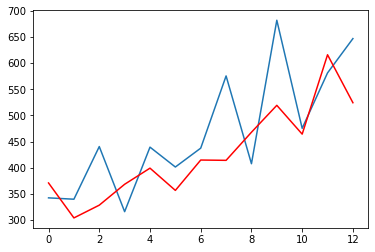

In [61]:
plt.plot(test)
plt.plot(prediction, color='red')
